# Telco Customer Churn analysis

Disclimer : run the code with python 3.8

## Step 1 import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cbook import boxplot_stats 

## Step 2 import package

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv',encoding ='latin')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges variables looks odd, it has data type object

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check the NA with sort value TotalCharges

In [6]:
df.sort_values(by='TotalCharges').head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


There are empty data at TotalCharges variable with value "space"

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Fill the empty data at TotalCharges with 0 its because the tenure values are 0 

In [8]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.sort_values(by='TotalCharges').head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.00,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.00,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.00,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.00,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.00,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.00,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.00,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.00,No


## Step 3 Data Exploration


In [10]:
# catagorical data encoding
df2 = df.copy() # make a copy variable with df 
df2.drop('customerID', axis=1, inplace=True) # drop columns customerID 
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True) # replace Churn "Yes" with value 1 
df2['Churn'].replace(to_replace='No', value=0, inplace=True) # replace Churn "Yes" with value 0
df2['SeniorCitizen'].replace(to_replace=1, value='Yes', inplace=True) # replace SeniorCitizen "1" with value "Yes"
df2['SeniorCitizen'].replace(to_replace=0, value='No', inplace=True) # replace SeniorCitizen "0" with value "No"
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


Plot the target variable ("Churn")

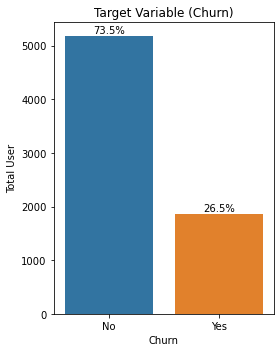

In [11]:
fig, ax = plt.subplots(figsize=(4,5))
ax = sns.countplot(x='Churn', data=df)
plt.ylabel('Total User')
plt.title('Target Variable (Churn)')
total_check = len(df)
for p in ax.patches:
      percentage = f'{100 * p.get_height() / total_check:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Pearson Correlation Churn Variable test

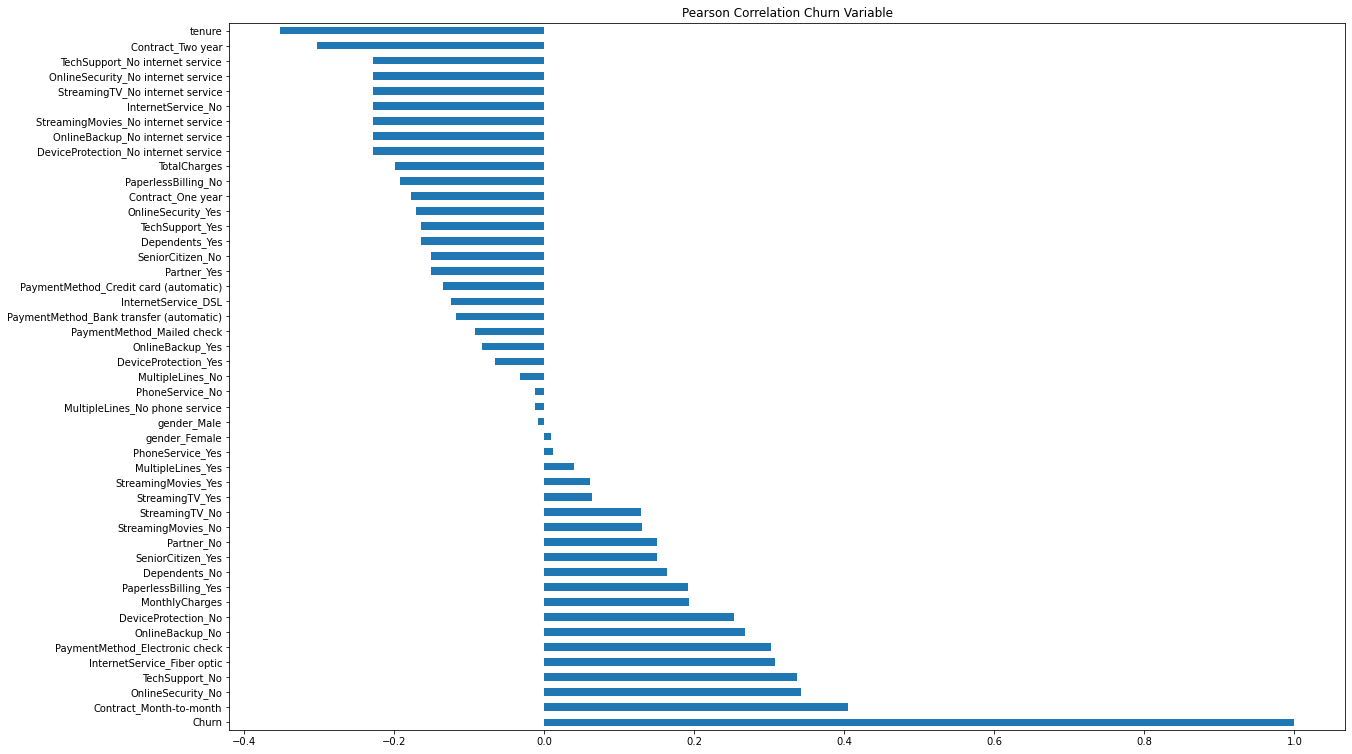

In [12]:
plt.figure(figsize=(20,13))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='barh')
plt.title("Pearson Correlation Churn Variable")
plt.show()

The value of Pearson Correlation Churn Variable test with sort value from highst to lowest

In [13]:
df_dummies.corr()['Churn'].sort_values(ascending = False).round(2)

Churn                                      1.00
Contract_Month-to-month                    0.41
OnlineSecurity_No                          0.34
TechSupport_No                             0.34
InternetService_Fiber optic                0.31
PaymentMethod_Electronic check             0.30
OnlineBackup_No                            0.27
DeviceProtection_No                        0.25
MonthlyCharges                             0.19
PaperlessBilling_Yes                       0.19
Dependents_No                              0.16
SeniorCitizen_Yes                          0.15
Partner_No                                 0.15
StreamingMovies_No                         0.13
StreamingTV_No                             0.13
StreamingTV_Yes                            0.06
StreamingMovies_Yes                        0.06
MultipleLines_Yes                          0.04
PhoneService_Yes                           0.01
gender_Female                              0.01
gender_Male                             

Pearson Correlation Churn Variable test with Heatmap

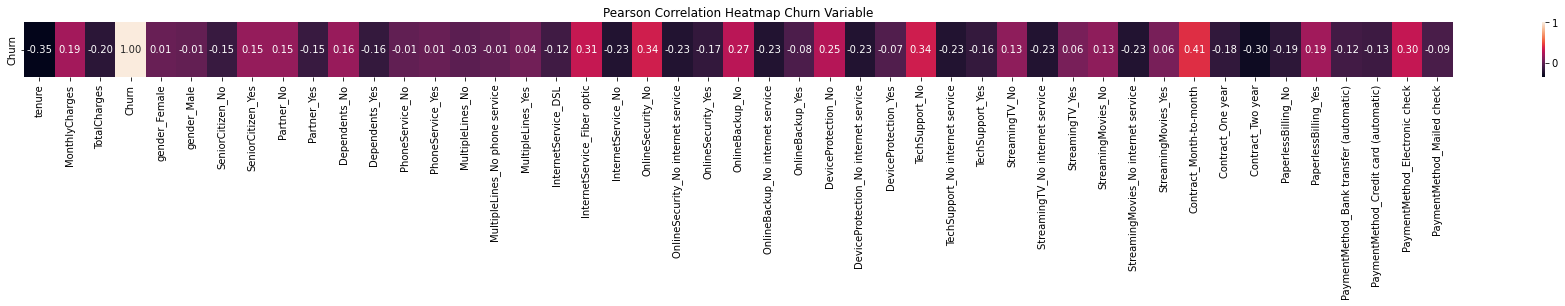

In [14]:
df_corr = df_dummies.corr()
fig, ax = plt.subplots(figsize=(32, 1))
ax = sns.heatmap(df_corr.iloc[3:4, :], annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap Churn Variable")
plt.show()

Plot the Churn variable relationship with variables that are similar or related to each other (gender, SeniorCitizen, Partner, and, Dependents)

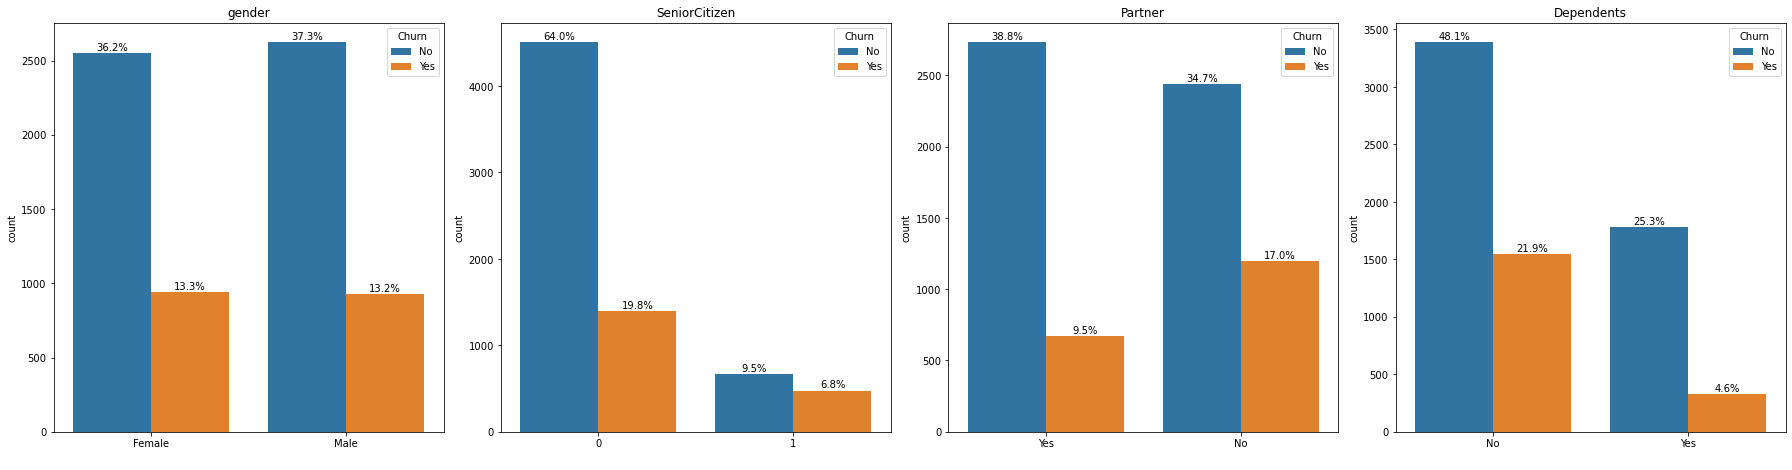

In [15]:
a = 1
plt.figure(figsize=[25,25])
df_n = df.loc[:,['gender', 'SeniorCitizen', 'Partner', 'Dependents','Churn']]
for i in df_n.iloc[:,:-1].columns:
    plt.subplot(4,4,a)
    a+=1
    ax = sns.countplot(x=i, hue='Churn', data=df_n)
    plt.title(i)
    plt.xlabel(' ')
    total = len(df_n)
    for p in ax.patches:
      percentage = f'{100 * p.get_height() / total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Plot the Churn variable relationship with variables that are similar or related to each other (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection ,TechSupport, StreamingTV, and StreamingMovies)

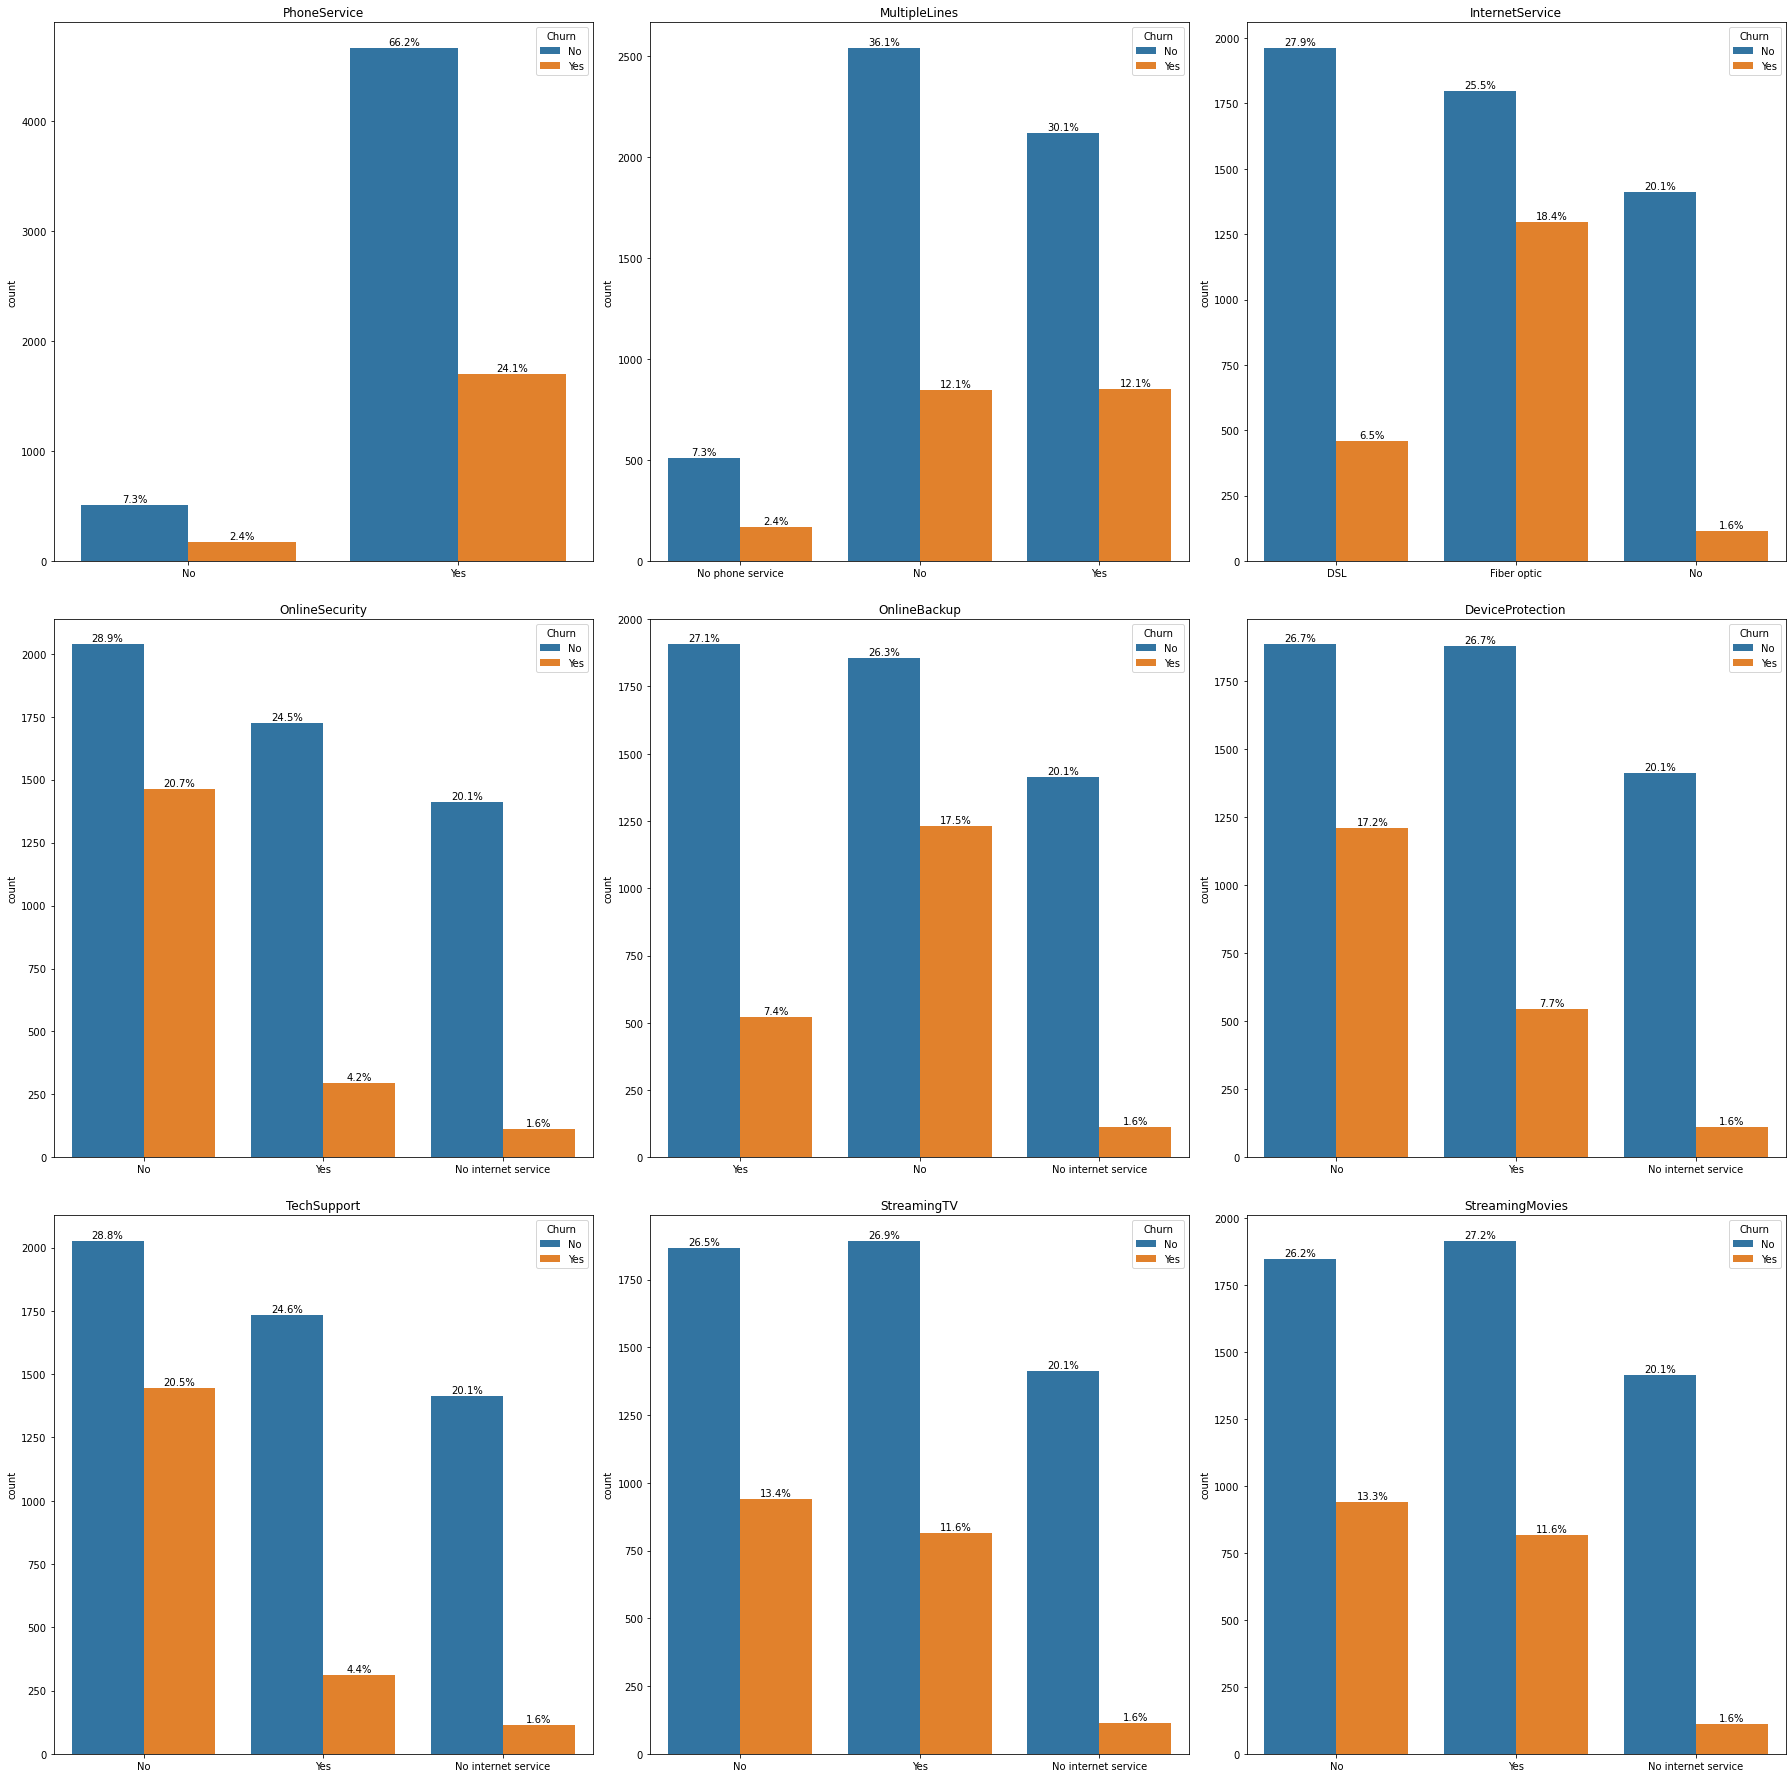

In [16]:
a = 1
plt.figure(figsize=[25,25])
df_n = df.loc[:,['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']]
for i in df_n.iloc[:,:-1].columns:
    plt.subplot(3,3,a)
    a+=1
    ax = sns.countplot(x=i, hue='Churn', data=df_n)
    plt.title(i)
    plt.xlabel(' ')
    total = len(df_n)
    for p in ax.patches:
      percentage = f'{100 * p.get_height() / total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Plot the Churn variable relationship with the PaperlessBilling variable

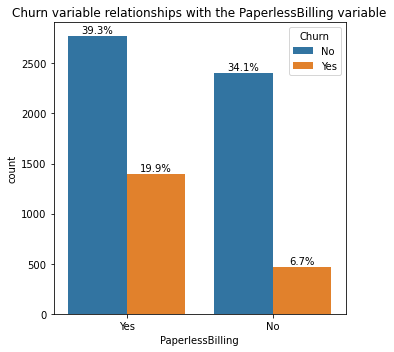

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data = df)
plt.title("Churn variable relationships with the PaperlessBilling variable")
total1 = len(df)
for p in ax.patches:
      percentage = f'{100 * p.get_height() / total1:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Plot the Churn variable relationship with the PaymentMethod variable

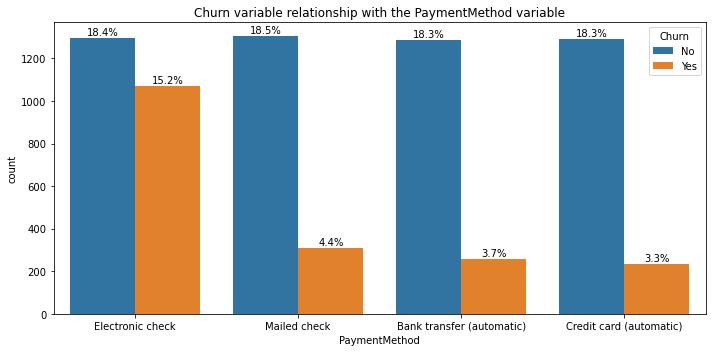

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data = df)
plt.title("Churn variable relationship with the PaymentMethod variable")
total1 = len(df)
for p in ax.patches:
      percentage = f'{100 * p.get_height() / total1:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Churn variable relationship between Contract, and MonthlyCharges with Boxplot

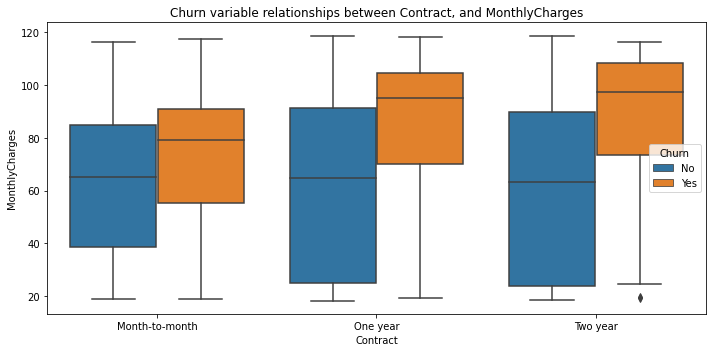

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='Contract', y= 'MonthlyCharges', hue='Churn', data = df)
plt.title("Churn variable relationships between Contract, and MonthlyCharges")
total1 = len(df)
for p in ax.patches:
      percentage = f'{100 * p.get_height() / total1:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Churn variable relationship between TotalCharges, tenure, and MonthlyCharges with Boxplot

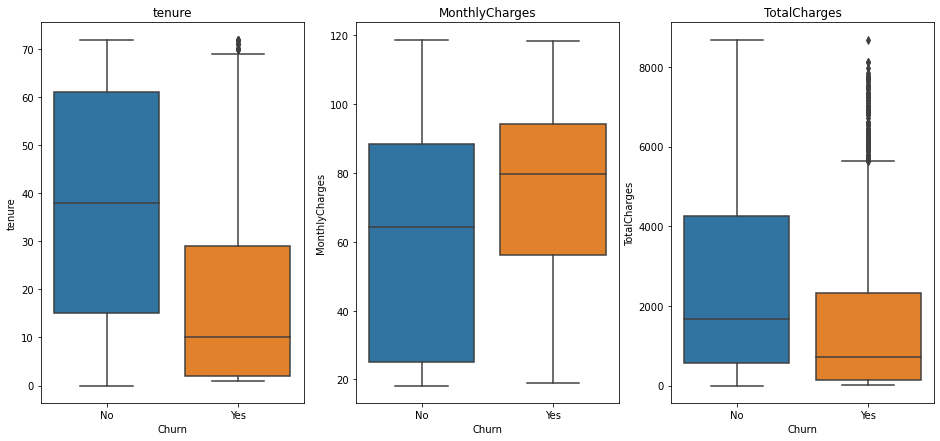

In [20]:
a = 1
df_n_check = df.loc[:,['TotalCharges', 'tenure', 'MonthlyCharges', 'Churn']]
boxplot_cek = ['tenure','MonthlyCharges','TotalCharges']
fig, axes = plt.subplots(1,3,figsize=(16,7))
for i in boxplot_cek:
    plt.subplot(1,3,a)
    a+=1
    ax = sns.boxplot(y=i, x='Churn', data=df_n_check)
    plt.title(i)

## Step 4 Outliers analysis of TotalCharges and Churn

check the ouliers data with boxplot_stats

In [21]:
df_check = df.loc[:, ['TotalCharges', 'Churn']]
boxplot_stats(df_check.loc[df.Churn.eq('No'), "TotalCharges"])
for Churn, data in df_check.groupby('Churn'):
    data = data.iloc[:, :-1]  # drop off the species column
    print(f'Outliers for: {Churn}')
    stats = boxplot_stats(data)
    for col, stat in zip(data.columns, stats):
        print(f"{col}: {stat['fliers'].tolist()}")
    print('\n')

Outliers for: No
TotalCharges: []


Outliers for: Yes
TotalCharges: [7611.85, 6603.0, 7007.6, 6396.45, 6786.4, 6985.65, 5794.65, 6125.4, 6017.65, 7250.15, 6413.65, 6215.35, 7532.15, 6383.35, 6127.6, 6448.05, 8127.6, 5961.1, 7133.25, 6254.2, 6547.7, 6873.75, 5769.75, 6710.5, 5918.8, 6615.15, 6937.95, 5940.85, 5885.4, 6287.25, 7040.85, 6056.15, 7482.1, 6941.2, 6822.15, 7318.2, 5893.15, 6465.0, 5742.9, 6281.45, 6341.45, 6890.0, 6010.05, 7101.5, 6283.3, 6143.15, 7690.9, 7372.65, 5763.3, 5685.8, 7689.95, 7534.65, 7156.2, 5921.35, 6110.2, 5638.3, 6144.55, 8109.8, 5812.6, 6851.65, 6137.0, 5743.05, 6871.9, 6529.25, 6975.25, 7446.9, 6440.25, 8684.8, 7262.0, 5688.05, 6979.8, 6405.0, 6145.85, 6981.35, 7804.15, 7220.35, 5639.05, 6903.1, 6428.4, 6252.9, 6579.05, 7856.0, 6205.5, 7674.55, 7548.1, 6581.9, 5785.5, 7176.55, 7299.65, 7491.75, 7723.9, 6039.9, 5916.45, 7752.3, 6585.35, 5643.4, 6441.4, 5769.6, 7723.7, 7348.8, 6219.6, 7968.85, 7432.05, 5746.15, 6876.05, 6014.85, 6859.5, 6418.9, 6886.25]




Make new variable with values of boxplot_stats checked

In [22]:
TotalCharges_cek = {'TotalCharges_cek' :[7611.85, 6603.0, 7007.6, 6396.45, 6786.4, 6985.65, 5794.65, 6125.4, 6017.65, 7250.15, 6413.65, 6215.35, 7532.15, 6383.35, 6127.6, 6448.05, 8127.6, 5961.1, 7133.25, 6254.2, 6547.7, 6873.75, 5769.75, 6710.5, 5918.8, 6615.15, 6937.95, 5940.85, 5885.4, 6287.25, 7040.85, 6056.15, 7482.1, 6941.2, 6822.15, 7318.2, 5893.15, 6465.0, 5742.9, 6281.45, 6341.45, 6890.0, 6010.05, 7101.5, 6283.3, 6143.15, 7690.9, 7372.65, 5763.3, 5685.8, 7689.95, 7534.65, 7156.2, 5921.35, 6110.2, 5638.3, 6144.55, 8109.8, 5812.6, 6851.65, 6137.0, 5743.05, 6871.9, 6529.25, 6975.25, 7446.9, 6440.25, 8684.8, 7262.0, 5688.05, 6979.8, 6405.0, 6145.85, 6981.35, 7804.15, 7220.35, 5639.05, 6903.1, 6428.4, 6252.9, 6579.05, 7856.0, 6205.5, 7674.55, 7548.1, 6581.9, 5785.5, 7176.55, 7299.65, 7491.75, 7723.9, 6039.9, 5916.45, 7752.3, 6585.35, 5643.4, 6441.4, 5769.6, 7723.7, 7348.8, 6219.6, 7968.85, 7432.05, 5746.15, 6876.05, 6014.85, 6859.5, 6418.9, 6886.25]}

Make a data frame of TotalCharges_cek

In [23]:
dfcek1 = pd.DataFrame(TotalCharges_cek)

In [24]:
dfcek1.describe()

,TotalCharges_cek
count,109.000000
mean,6670.281193
std,695.562975
min,5638.300000
25%,6125.400000
50%,6579.050000
75%,7176.550000
max,8684.800000


Filter the ouliers data from df

In [25]:
df_check2 = df[df['TotalCharges'] >= 5638.300]
df_check3 = df_check2[df_check2['Churn'] == 'Yes']

Find unique data of outliers variable

In [26]:
for col in df_check3.columns:
    print(f"Column: {col}")
    print(df_check3[col].unique())
    print("="*10)

Column: customerID
['3192-NQECA' '1343-EHPYB' '0979-PHULV' '7752-XUSCI' '3419-SNJJD'
 '7207-RMRDB' '4913-EHYUI' '3009-JWMPU' '2239-JALAW' '4853-RULSV'
 '2382-BCKQJ' '7549-MYGPK' '2834-JRTUA' '6646-QVXLR' '6818-WOBHJ'
 '2408-TZMJL' '0201-OAMXR' '4791-QRGMF' '3838-OZURD' '9518-RWHZL'
 '5469-CTCWN' '2886-KEFUM' '9651-GTSAQ' '2003-CKLOR' '3092-IGHWF'
 '6097-EQISJ' '6990-YNRIO' '9614-RMGHA' '0348-SDKOL' '3424-NMNBO'
 '7694-VLBWQ' '6481-OGDOO' '2659-VXMWZ' '3571-RFHAR' '1587-FKLZB'
 '5440-FLBQG' '3870-MQAMG' '5236-PERKL' '0407-BDJKB' '4446-BZKHU'
 '3351-NQLDI' '3763-GCZHZ' '0310-MVLET' '4550-VBOFE' '0596-BQCEQ'
 '1891-FZYSA' '7317-GGVPB' '8809-RIHDD' '8849-GYOKR' '1625-JAIIY'
 '0917-EZOLA' '0748-RDGGM' '1150-WFARN' '6771-XWBDM' '1725-IQNIY'
 '2533-QVMSK' '5089-IFSDP' '3886-CERTZ' '0946-CLJTI' '0324-BRPCJ'
 '2748-MYRVK' '4088-YLDSU' '2632-UCGVD' '5445-PZWGX' '6425-YQLLO'
 '5502-RLUYV' '8580-QVLOC' '2889-FPWRM' '6305-YLBMM' '3791-LGQCY'
 '7067-KSAZT' '7124-UGSUR' '1502-XFCVR' '7762-URZQH' '819

Create multiple plots to see the relationship between category columns and Churn to outliers

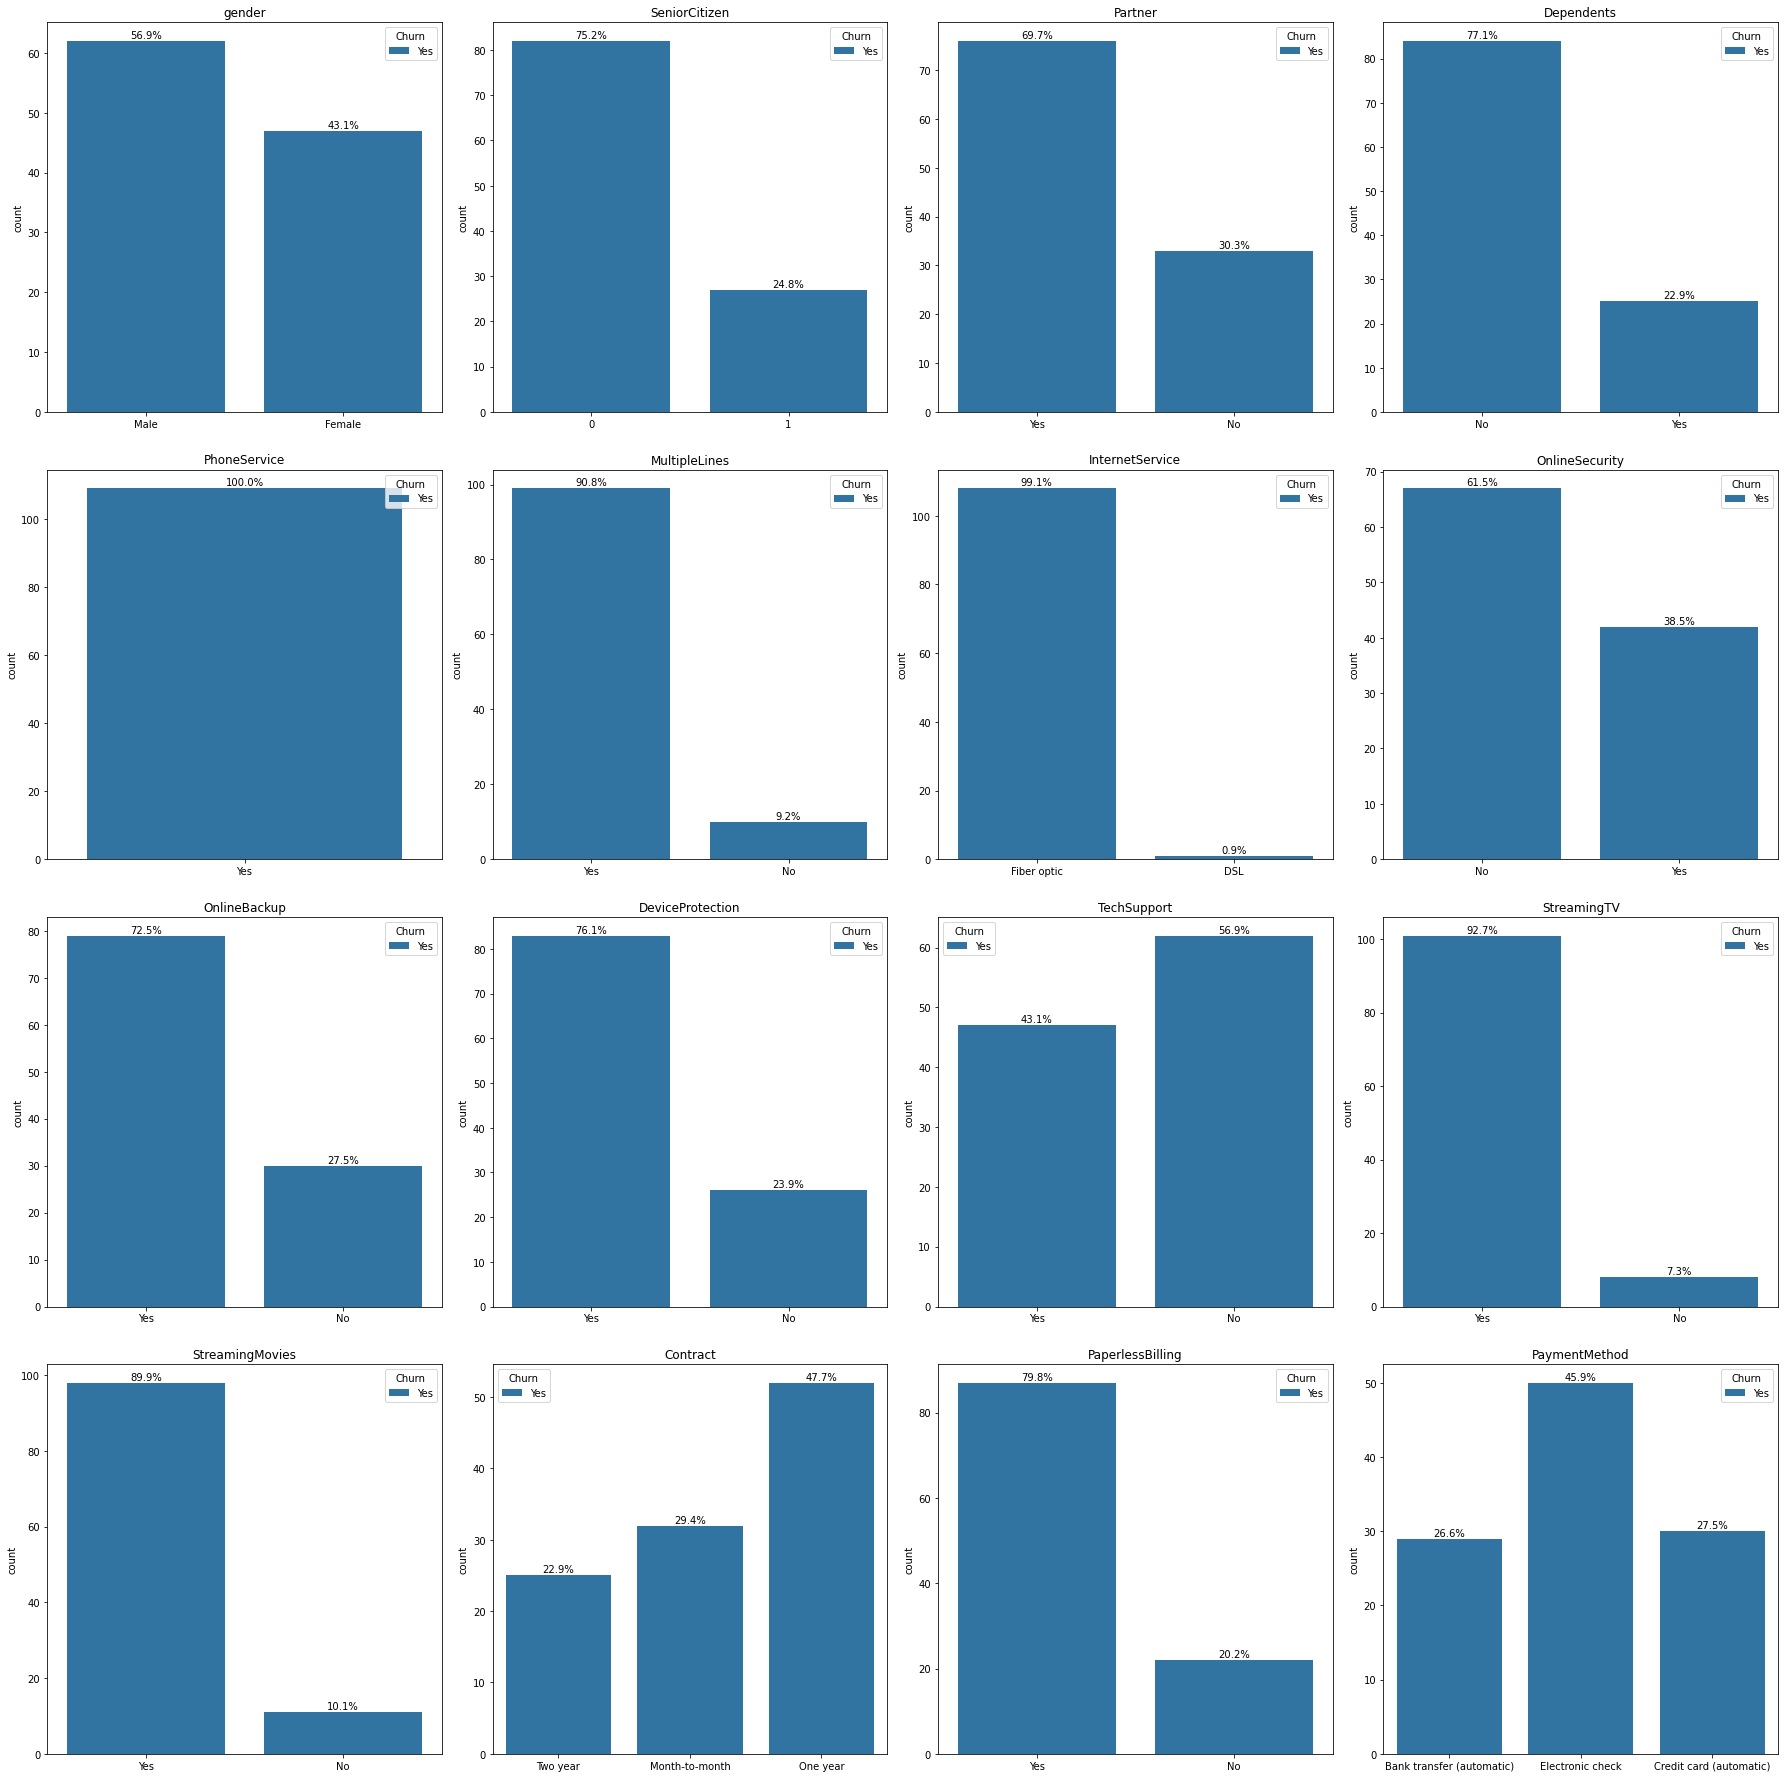

In [27]:
a = 1
plt.figure(figsize=[25,25])
df_n1 = df_check3.drop(['tenure','MonthlyCharges','TotalCharges', 'customerID'], axis=1)
for i in df_n1.iloc[:,:-1].columns:
    plt.subplot(4,4,a)
    a+=1
    ax = sns.countplot(x=i, hue='Churn', data=df_n1)
    plt.title(i)
    plt.xlabel(' ')
    total = len(df_n1)
    for p in ax.patches:
      percentage = f'{100 * p.get_height() / total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

Churn variable relationship between TotalCharges, tenure, and MonthlyCharges of outliers variable with Boxplot

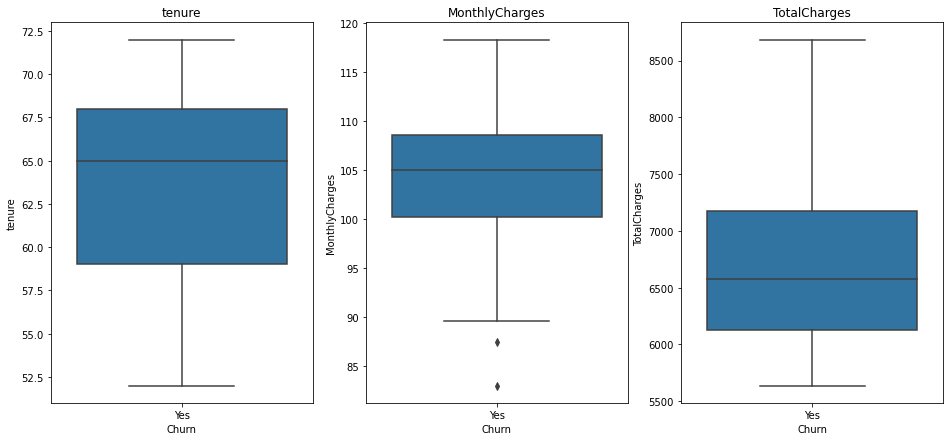

In [28]:
a = 1
df_n2 = df_check3.loc[:,['TotalCharges', 'tenure', 'MonthlyCharges', 'Churn']]
boxplot_cek1 = ['tenure','MonthlyCharges','TotalCharges']
fig, axes = plt.subplots(1,3,figsize=(16,7))
for i in boxplot_cek1:
    plt.subplot(1,3,a)
    a+=1
    ax = sns.boxplot(y=i, x='Churn', data=df_n2)
    plt.title(i)